In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

import tensorflow as tf

# Configure TensorFlow to use multiple threads
tf.config.threading.set_intra_op_parallelism_threads(8)
tf.config.threading.set_inter_op_parallelism_threads(8)

Contents of the dataset directory:
['Monkey Pox', 'Monkey_Pox_Probability_Calculator.ipynb', 'Normal', 'Other']


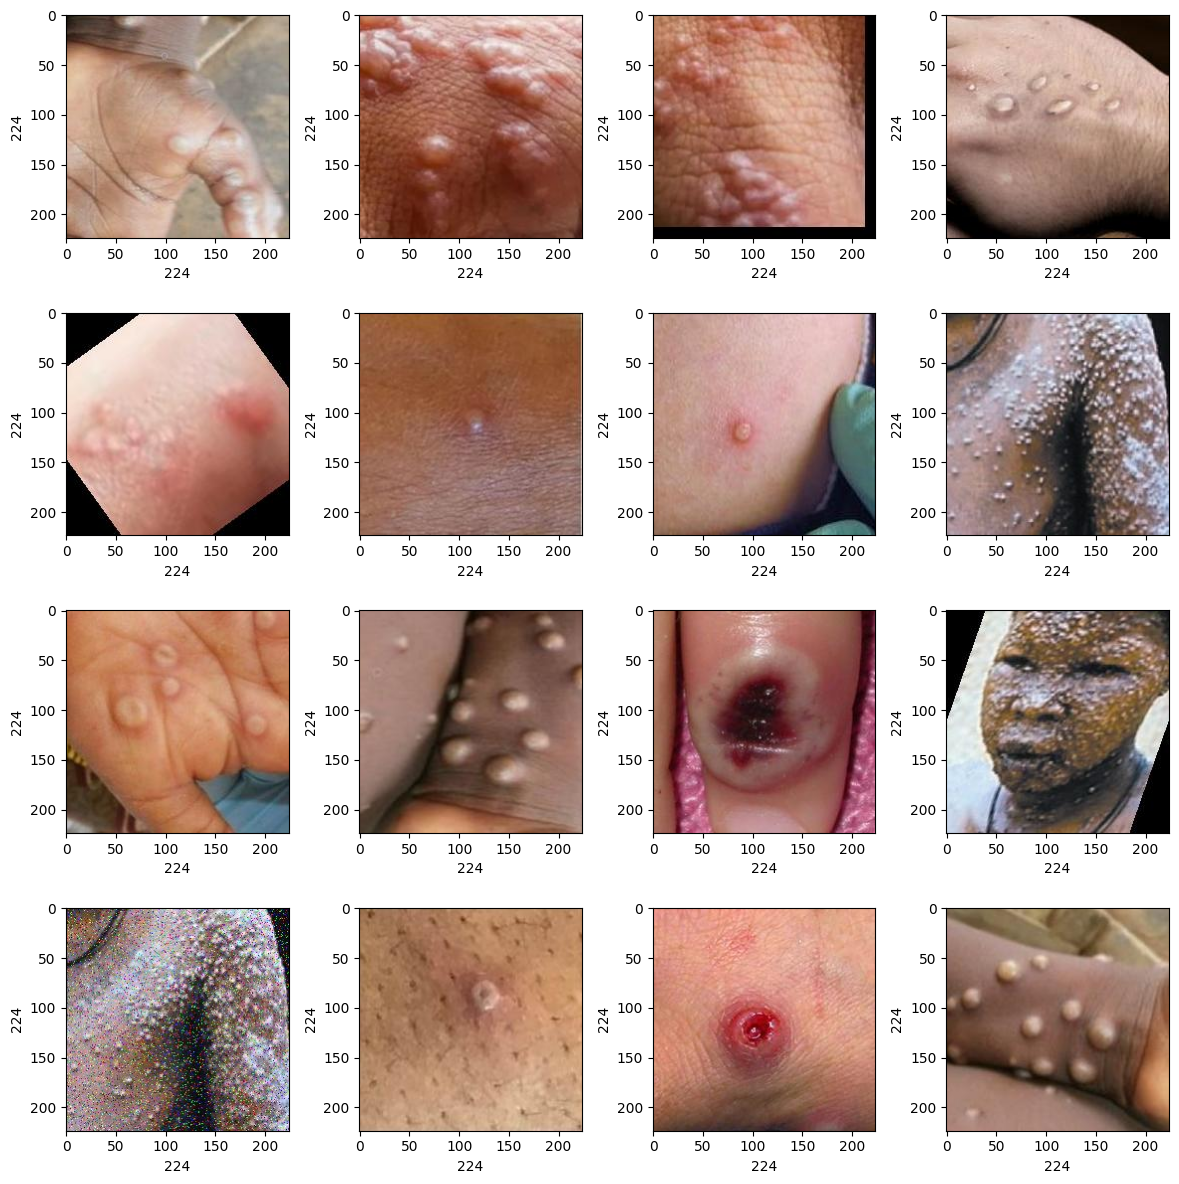

In [4]:
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Path to the dataset on the local machine
dataset_path = r"C:\Users\Shamiur Rahman\Desktop\Monkey Pox Dataset"

# List the contents of the dataset directory
print("Contents of the dataset directory:")
print(os.listdir(dataset_path))

# Plotting 12 images to check the dataset
plt.figure(figsize=(12, 12))
monkey_pox_path = os.path.join(dataset_path, "Monkey Pox")
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img = imread(monkey_pox_path + '/' + random.choice(sorted(os.listdir(monkey_pox_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize=10)  # width of image
    plt.ylabel(rand_img.shape[0], fontsize=10)  # height of image

plt.show()

In [6]:
#Converting Images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [8]:
dir = r"C:\Users\Shamiur Rahman\Desktop\Monkey Pox Dataset"
# Get list of subdirectories, not files within the directory
root_dir = [d for d in listdir(dir) if os.path.isdir(os.path.join(dir, d))]
image_list, label_list = [], []
all_labels = ['Monkey Pox', 'Normal', 'Other']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [9]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0
2    2391
0     669
1     293
Name: count, dtype: int64

In [12]:
image_list[0].shape

(256, 256, 3)

In [14]:
label_list = np.array(label_list)
label_list.shape

(3353,)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)
# Splitting the data into training set and testing set

In [18]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

# Dividing each image pixel by 255 to normalize the data

In [19]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

C:\AnnaConda\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       225,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,347 (903.70 KB)

 Trainable params: 231,347 (903.70 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])
# Setting the type of loss, optimizer and metrics

In [26]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)


In [28]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (x_val, y_val))

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.6079 - loss: 0.9209 - val_accuracy: 0.7412 - val_loss: 0.7674
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7143 - loss: 0.7794 - val_accuracy: 0.7412 - val_loss: 0.7486
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7085 - loss: 0.7728 - val_accuracy: 0.7412 - val_loss: 0.7470
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6929 - loss: 0.7793 - val_accuracy: 0.7412 - val_loss: 0.7222
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7172 - loss: 0.7318 - val_accuracy: 0.7412 - val_loss: 0.6906
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7128 - loss: 0.7015 - val_accuracy: 0.7412 - val_loss: 0.6969
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7193 - loss: 0.6987 - val_accuracy: 0.7412 - val_loss: 0.6730
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7127 - loss: 0.6821 - val_accuracy: 0.7412 - val_loss:

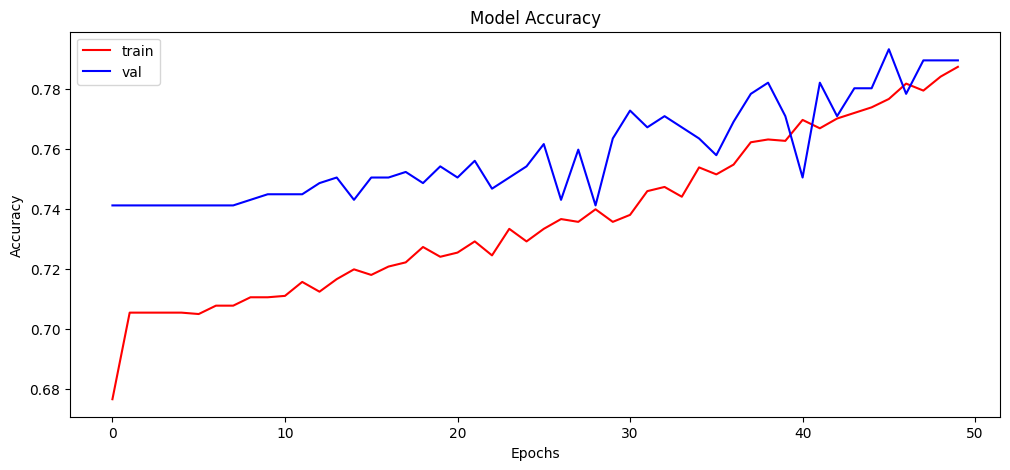

In [30]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [32]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.7876 - loss: 0.5376
Test Accuracy: 75.85693001747131


In [34]:
y_pred = model.predict(x_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step


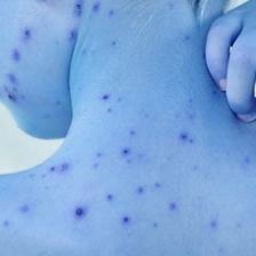

In [36]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [38]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Other
Predicted :  Other
